In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [36]:
#Load dataset
credit_card = pd.read_csv('../working/CREDIT CARD.csv')
credit_card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,751,1.284612,0.303073,-0.067909,0.930684,0.117387,-0.487005,0.204739,-0.174873,0.058270,...,-0.023272,-0.043358,-0.209701,-0.446091,0.791745,-0.276971,0.009979,0.013268,14.05,0
995,751,-0.654892,0.608319,1.585102,-3.009429,0.037593,-1.954023,1.335977,-0.612858,0.690254,...,-0.078527,-0.064194,-0.107350,0.961776,-0.067760,-0.549465,-0.232588,-0.108261,3.90,0
996,752,-2.101171,-0.227365,1.624668,-0.291123,1.902446,-1.483921,-0.275117,0.085964,-0.563098,...,-0.313782,-0.804784,-0.474101,0.008102,0.259725,0.032376,0.323580,0.034622,1.78,0
997,753,-1.248163,0.315246,3.708935,0.687280,-0.873071,1.091287,0.297707,-0.633135,1.102317,...,-0.824013,0.057907,-0.282351,0.630774,0.283506,-0.204264,0.097555,-0.670480,30.00,0


In [4]:
# Display the descriptive statistics for credit_card csv
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,371.094094,-0.183227,0.223254,0.874595,0.244180,-0.033066,0.153773,0.096336,-0.057624,-0.003532,...,0.001693,-0.123643,-0.040133,-0.000471,0.111585,0.026221,0.012225,-0.018865,66.488769,0.002002
std,223.071062,1.318391,1.154119,1.026587,1.255398,1.085276,1.235180,0.840845,0.876364,0.889223,...,0.624888,0.611385,0.356314,0.617137,0.429485,0.471693,0.319085,0.267677,187.356969,0.044721
min,0.000000,-6.093248,-12.114213,-5.694973,-4.657545,-6.631951,-3.498447,-4.925568,-7.494658,-2.980624,...,-4.134608,-2.776923,-3.553381,-1.867208,-1.544209,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,170.000000,-0.934040,-0.188004,0.308187,-0.487677,-0.563479,-0.630038,-0.334410,-0.174072,-0.493730,...,-0.219877,-0.542765,-0.178245,-0.364926,-0.167012,-0.304936,-0.047337,-0.023588,5.435000,0.000000
50%,368.000000,-0.376162,0.284236,0.888613,0.330125,-0.148269,-0.121924,0.088019,0.031283,-0.068274,...,-0.080414,-0.101469,-0.050821,0.089264,0.144624,0.004232,0.020370,0.020214,16.190000,0.000000
75%,559.000000,1.126413,0.866284,1.530569,1.069171,0.441114,0.476470,0.562220,0.252817,0.438249,...,0.083120,0.282102,0.073939,0.420973,0.419696,0.264192,0.109621,0.084280,55.225000,0.000000
max,755.000000,1.685314,5.267376,4.017561,4.861129,7.672544,5.122103,4.808426,3.877662,5.459274,...,5.273420,1.574750,3.150413,1.215279,1.206820,3.087444,2.490503,1.575380,3828.040000,1.000000


In [37]:
# Explore dataset
print(credit_card.isnull().sum())
print(credit_card['Class'].value_counts(normalize=True))

             Time          V1          V2          V3          V4          V5  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean   371.094094   -0.183227    0.223254    0.874595    0.244180   -0.033066   
std    223.071062    1.318391    1.154119    1.026587    1.255398    1.085276   
min      0.000000   -6.093248  -12.114213   -5.694973   -4.657545   -6.631951   
25%    170.000000   -0.934040   -0.188004    0.308187   -0.487677   -0.563479   
50%    368.000000   -0.376162    0.284236    0.888613    0.330125   -0.148269   
75%    559.000000    1.126413    0.866284    1.530569    1.069171    0.441114   
max    755.000000    1.685314    5.267376    4.017561    4.861129    7.672544   

               V6          V7          V8          V9  ...         V21  \
count  999.000000  999.000000  999.000000  999.000000  ...  999.000000   
mean     0.153773    0.096336   -0.057624   -0.003532  ...    0.001693   
std      1.235180    0.840845    0.876364    0.8

## Exploratory Data Analysis (EDA)

<Axes: xlabel='Class', ylabel='count'>

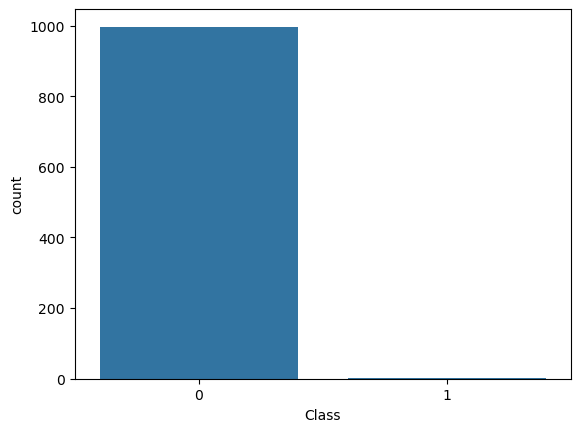

In [39]:
# Class Balance (Fraud vs Legit)
credit_card['Class'].value_counts(normalize=True)
sns.countplot(x='Class', data=credit_card)

In [8]:
#correlation matrix for credit_card
credit_card.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.005719,0.018880,0.018966,-0.094487,-0.051831,-0.079440,-0.053069,-0.015720,0.018218,...,-0.011773,-0.070017,-0.013650,-0.011955,-0.032392,0.038423,-0.037427,0.000349,-0.038294,0.013641
V1,0.005719,1.000000,-0.132577,-0.270061,0.146671,-0.164744,-0.041669,-0.212223,0.083178,-0.145803,...,-0.143131,-0.036223,-0.106780,0.006078,0.327488,-0.009622,-0.050230,0.168776,-0.221861,-0.084791
V2,0.018880,-0.132577,1.000000,0.001158,0.055829,0.105558,-0.090453,0.198413,-0.106815,0.014631,...,0.018653,-0.106008,0.013778,-0.005191,-0.154852,-0.049214,0.127511,-0.025858,-0.575527,-0.032068
V3,0.018966,-0.270061,0.001158,1.000000,0.052165,-0.102055,-0.141343,0.037235,-0.105656,0.077833,...,0.046885,0.316372,0.052168,0.068592,-0.312880,0.089896,-0.127335,-0.165213,-0.220418,-0.049556
V4,-0.094487,0.146671,0.055829,0.052165,1.000000,-0.072343,0.048419,-0.000811,0.085790,-0.091024,...,0.005659,0.062209,0.036681,0.035875,0.052525,-0.041124,0.096378,0.130930,0.083204,0.103482
V5,-0.051831,-0.164744,0.105558,-0.102055,-0.072343,1.000000,0.260855,0.065587,-0.016550,0.038951,...,-0.045251,-0.095821,0.003410,0.009993,-0.048128,-0.175902,-0.082165,-0.108663,-0.319523,0.018658
V6,-0.079440,-0.041669,-0.090453,-0.141343,0.048419,0.260855,1.000000,-0.092000,0.096293,0.022909,...,0.095422,0.010945,-0.110990,-0.008907,0.051148,0.015246,0.019536,-0.028311,0.230292,-0.050771
V7,-0.053069,-0.212223,0.198413,0.037235,-0.000811,0.065587,-0.092000,1.000000,-0.101299,0.027352,...,-0.142635,-0.005259,-0.049701,-0.023592,-0.248014,-0.070792,-0.168228,-0.330065,0.316508,-0.064071
V8,-0.015720,0.083178,-0.106815,-0.105656,0.085790,-0.016550,0.096293,-0.101299,1.000000,-0.135060,...,-0.387309,0.172683,0.009239,-0.014010,0.028279,0.032730,0.212752,0.280708,-0.018739,0.036793
V9,0.018218,-0.145803,0.014631,0.077833,-0.091024,0.038951,0.022909,0.027352,-0.135060,1.000000,...,-0.000743,0.041299,-0.092098,-0.036786,0.098370,0.069324,-0.027406,-0.275527,-0.024629,-0.076446


<Axes: xlabel='Class', ylabel='Amount'>

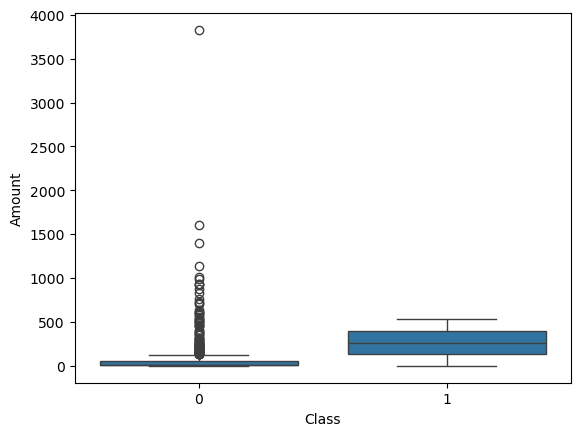

In [40]:
# transaction amount distribution
sns.boxplot(x='Class', y='Amount', data= credit_card)

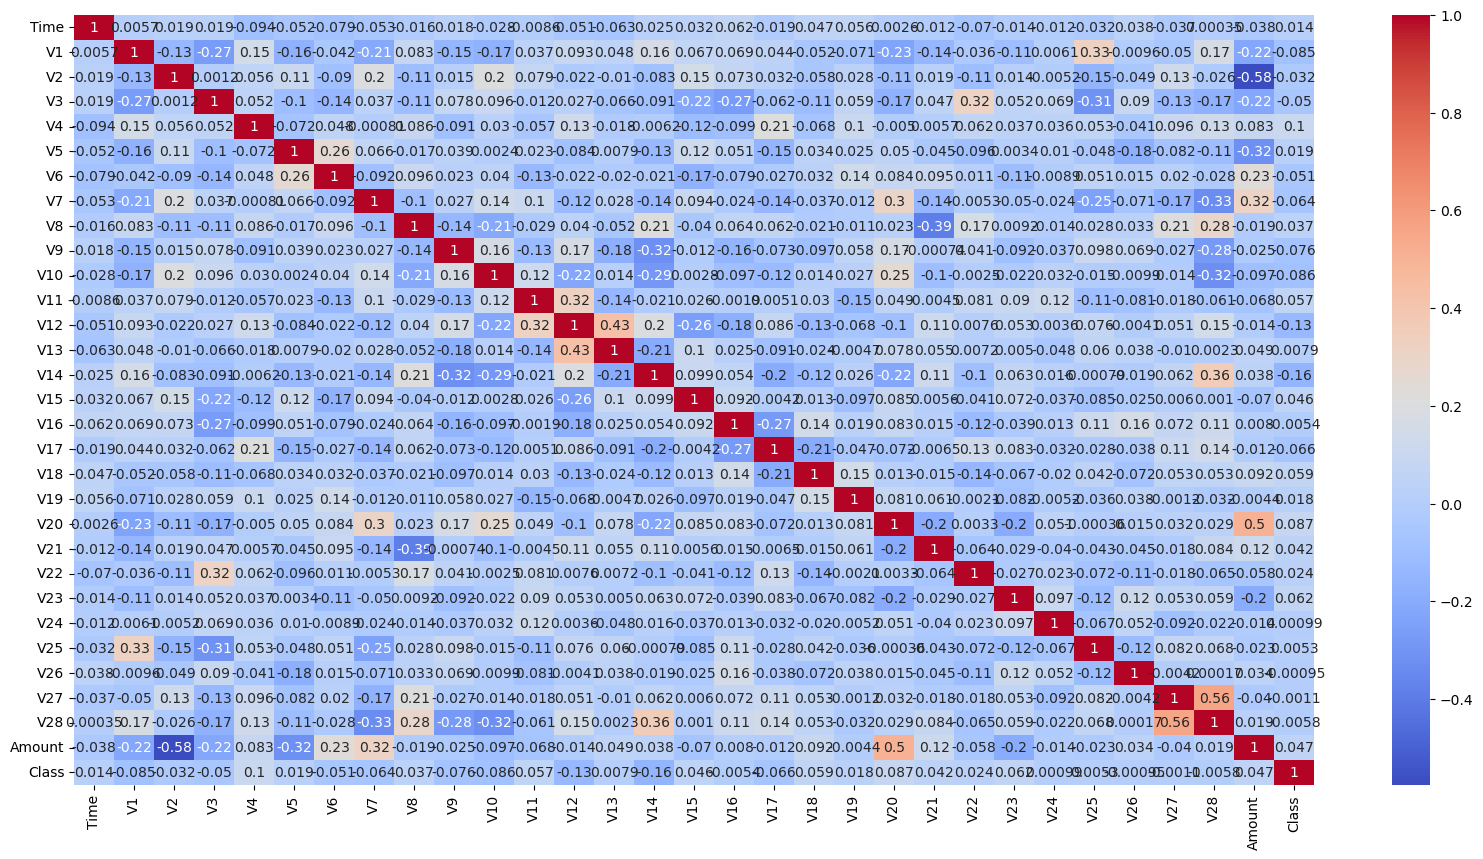

In [57]:
# Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(credit_card.corr(), cmap="coolwarm", annot=True)
plt.show()

In [46]:
# Separate features and target
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [47]:
# Train/test split with stratification
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)
print("Resampled class distribution:\n", y_train_res.value_counts())

# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

Resampled class distribution:
 Class
0    797
1    797
Name: count, dtype: int64


LogisticRegression()

In [51]:
# Predictions and probabilities
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [52]:
# Evaluation
print("Accuracy:", model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       0.00      0.00      0.00         0

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       1.00      0.99      1.00       200



C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


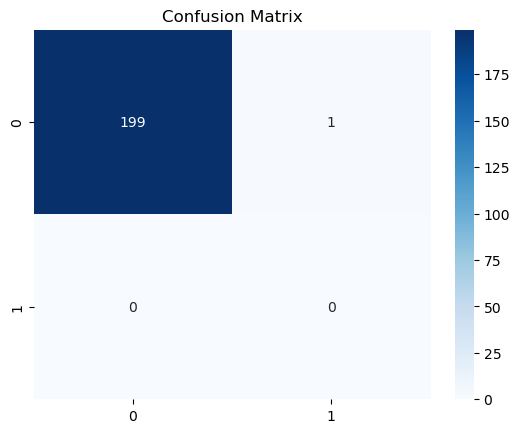

In [53]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

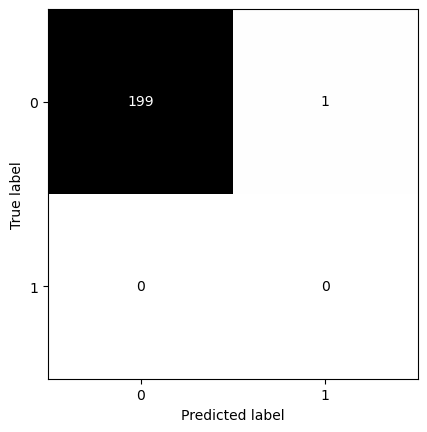

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, cmap='Greys')
plt.show()

In [56]:
# Classification report (includes precision, recall, F1-score)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     1.0000    0.9950    0.9975       200
           1     0.0000    0.0000    0.0000         0

    accuracy                         0.9950       200
   macro avg     0.5000    0.4975    0.4987       200
weighted avg     1.0000    0.9950    0.9975       200



C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\omorb\anaconda3\Anaaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
